# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math, cmath

In [0]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.
    
    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy. 
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.
        
    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    # ... ENTER YOUR CODE HERE ...

    xn = x0
    for i in range(0,maxiter):
        fxn = f(xn)
        Dfxn = fder(xn)
        if abs(fxn) < eps:
            return xn, i
        if Dfxn == 0: # no solution
            return None
        xn -= fxn/Dfxn
    

### Test I.1 

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [29]:
# ... ENTER YOUR CODE HERE ...
def f(x):
    return (x**2 - 1)

def fder(x):
    return 2*x

test_set = [5,-10, 10, 11.5, 20, 100]
for test in test_set:
  result = newton_iteration(f, fder, test, eps=1e-5, maxiter=1000)
  print('Initial value: ', test, '| Root: ', result[0], '| Iteration number: ', result[1])

Initial value:  5 | Root:  1.00000463565079 | Iteration number:  5
Initial value:  -10 | Root:  -1.0000000000139897 | Iteration number:  7
Initial value:  10 | Root:  1.0000000000139897 | Iteration number:  7
Initial value:  11.5 | Root:  1.0000000004062362 | Iteration number:  7
Initial value:  20 | Root:  1.0000000000149214 | Iteration number:  8
Initial value:  100 | Root:  1.0000000025490745 | Iteration number:  10


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [0]:
# ... ENTER YOUR CODE HERE ...

def modified_newton_iteration(f, fder, m, x0, eps=1e-5, maxiter=1000):
    xp = x0
    xn = xp - m * f(xp) / fder(xp)
    i = 1
    
    while True:
        if abs(xn - xp) > eps and i <= maxiter:
            xp = xn
            xn = xp - m * f(xp) / fder(xp)
            i+=1
        else:
            break
    return xn, i

In [83]:
def f0(x):
    return (x**2-1)**2
def fder0(x):
    return 4*x*(x**2-1)

test_set = [3,-10, 10, 11.5]
m = [1, 2, 3, 4]
for m_i in m:
    print('m =', m_i)
    for test in test_set:
      result = modified_newton_iteration(f, fder, m_i, test, eps=1e-5, maxiter=1000)
      print('Initial value: ', test, '| Root: ', result[0], '| Iteration number: ', result[1])



m = 1
Initial value:  3 | Root:  1.0 | Iteration number:  6
Initial value:  -10 | Root:  -1.0000000000139897 | Iteration number:  7
Initial value:  10 | Root:  1.0000000000139897 | Iteration number:  7
Initial value:  11.5 | Root:  1.0 | Iteration number:  8
m = 2
Initial value:  3 | Root:  0.33333333333333304 | Iteration number:  1001
Initial value:  -10 | Root:  -0.09999999999999964 | Iteration number:  1001
Initial value:  10 | Root:  0.09999999999999964 | Iteration number:  1001
Initial value:  11.5 | Root:  0.08695652173913082 | Iteration number:  1001
m = 3
Initial value:  3 | Root:  -1.0 | Iteration number:  2
Initial value:  -10 | Root:  -2.2847557697425156 | Iteration number:  1001
Initial value:  10 | Root:  2.2847557697425156 | Iteration number:  1001
Initial value:  11.5 | Root:  -14.710234622420222 | Iteration number:  1001
m = 4
Initial value:  3 | Root:  14.991030486564437 | Iteration number:  1001
Initial value:  -10 | Root:  -3869.8486693356267 | Iteration number:  100

# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

Посмотрим на график, чтобы понять, какое приближение нам нужно брать

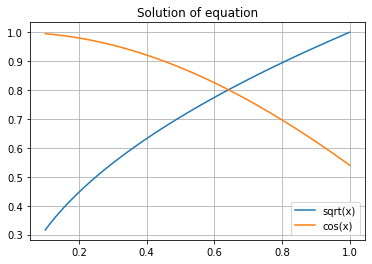

In [84]:
# ... ENTER YOUR CODE HERE ...

x = np.linspace(0.1, 1, 1000)
plt.plot(x, np.sqrt(x), label='sqrt(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.title('Solution of equation')
plt.grid()
plt.legend()

In [0]:
def fixed_point_iteration(f, x0, alpha, eps=1e-5, maxiter=1000): #аналогично
    xp = x0
    xn = xp - alpha * f(xp)
    i = 1
    while True:
        if abs(xn - xp) > eps and i <= maxiter:
          xp = xn
          xn = xp - alpha * f(xp)
          i+=1
        else:
          break
    return xn, i

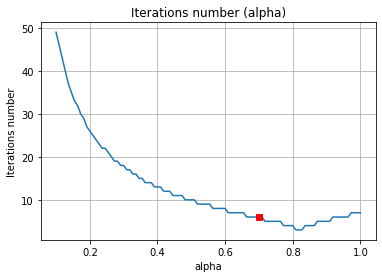

In [85]:
def f1(x):
    return (np.sqrt(x) - np.cos(x))

def fder1(x):
    return (0.5/np.sqrt(x) + np.sin(x))

  

x = np.linspace(0.1,1,100)
iterations = [fixed_point_iteration(f1, 0.6, x[i])[1] for i in range(100)] 
derivatives = [fder1(x[i]) for i in range(100)] 
m = min(derivatives) 
M = max(derivatives)

plt.title('Iterations number (alpha)')
plt.xlabel('alpha')
plt.ylabel('Iterations number')
plt.plot(x,iterations)
plt.plot(2 / (m + M),fixed_point_iteration(f1, 0.6, 2/(m+M))[1] , 'rs')
plt.grid()


Кол-во итераций, при котором метод быстрее всего сходится, равно 3.
Из графика слудет, что кол-во итераций при alpha = 2/(m+M) близко к минимальному кол-ву итераций. Значит все ок.




# Part III. Newton's fractal.

(Not graded). 

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points. 
Color the grid in three colors, according to the root, to which iterations converged.

In [0]:
#roots
z = [np.cos(2*k*np.pi/3) +1j*np.sin(2*k*np.pi/3) for k in (0, 1, 2)]

def f2(x):
    return (x**3 - 1)

def fder2(x): 
    return 3*x**2

def newton_fractal(n):
    x, y = np.linspace(-10,10, n), np.linspace(-10,10, n)
    for i in range(len(x)): 
        for k in range(len(y)):
            root = newton_iteration(f2, fder2, x[i]+1j*y[k], eps=1e-5, maxiter=100)[0]
            if np.abs(root-z[0])<1e-2: 
                plt.plot(x[i],y[k],'o',color = 'y')
            if np.abs(root-z[1])<1e-2:
                plt.plot(x[i],y[k],'o',color = 'g')
            if np.abs(root-z[2])<1e-2:
                plt.plot(x[i],y[k],'o',color = 'b')
    plt.title("Newton's fractal")
    plt.xlabel('Re(z)')
    plt.ylabel('Im(z)')


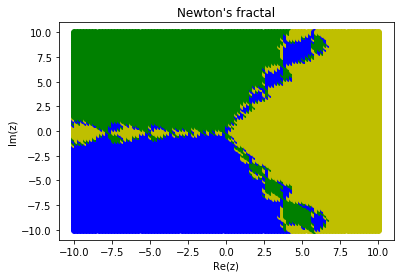

In [72]:
newton_fractal(100)